In [338]:
import pandas as pd
import numpy as np
import sklearn as sk
import datetime as dt
import time
import seaborn as sea
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pr
% matplotlib inline

In [163]:
meta_df = pd.read_csv('./PV_Dataset/meta_data_sites.csv')

In [164]:
meta_df.iloc[0]

{"errors":[]                                              {"errors":[]
outputs:[{"available_years":[2000    outputs:[{"available_years":[2007
2006                                                              2008
2007                                                              2009
2008                                                              2010
2009                                                              2011
2010                                                              2012
2011                                                              2013
2012                                                              2014
2013                                                              2015
2014                                                             2016]
2015                                                     comments:null
2016]                                               confidential:false
comments:null                                       inverter_mfg:"SMA"
confid

In [165]:
cis_power = pd.read_csv('./PV_Dataset/Power/CIS/pvdaq_data_10_2011.csv')

In [166]:
dt_time = [dt.datetime.strptime(t,'%Y-%m-%d %H:%M:%S') for t in cis_power['Date-Time']]
cis_power['dt'] = pd.Series(dt_time,index=cis_power.index)

cis_power.head()

,SiteID,Date-Time,ac_current,ac_power,ac_voltage,ambient_temp,das_battery_voltage,das_temp,dc_pos_current,dc_pos_voltage,dc_power,inverter_temp,module_temp_1,module_temp_2,module_temp_3,poa_irradiance,dt
0,10,2011-01-01 00:00:00,0.1631,-0.1322,122.44,-11.947,14.146,-11.908,0.0143,-1.1094,-0.016371,-13.877,-14.999,-14.924,-14.673,-2.1996,2011-01-01 00:00:00
1,10,2011-01-01 00:01:00,0.1661,-0.1653,122.42,-11.992,14.143,-11.887,0.0156,0.7528,0.012305,-13.859,-14.979,-14.924,-14.733,-2.1717,2011-01-01 00:01:00
2,10,2011-01-01 00:02:00,0.1626,-0.1322,122.49,-12.039,14.146,-11.879,0.0137,-1.1094,-0.015729,-13.855,-14.984,-14.931,-14.721,-2.2552,2011-01-01 00:02:00
3,10,2011-01-01 00:03:00,0.1628,-0.2094,122.49,-11.953,14.145,-11.862,0.0140,-0.9509,-0.014231,-13.834,-14.802,-14.762,-14.563,-2.1439,2011-01-01 00:03:00
4,10,2011-01-01 00:04:00,0.1637,-0.2094,122.49,-11.876,14.144,-11.862,0.0143,0.6560,0.010058,-13.825,-14.857,-14.798,-14.618,-2.0325,2011-01-01 00:04:00


In [167]:
# data for month of january
jan = cis_power[(cis_power['dt']>= dt.datetime(2011,1,1)) & (cis_power['dt']< dt.datetime(2011,2,1))]

# per day data
jan_per_day = dict()
for i in range(1,32):
    # consider complete 24 hours data (zero power periods and non zero power periods)
    #temp_df = jan[(jan['dt']>= dt.datetime(2011,1,i,0,0,0)) & (jan['dt']< dt.datetime(2011,1,i,23,59,59))]
    # consider only non-zero power periods
    temp_df = jan[(jan['dt']>= dt.datetime(2011,1,i,7,0,0)) & (jan['dt']< dt.datetime(2011,1,i,17,59,59))]
    jan_per_day[i] = temp_df

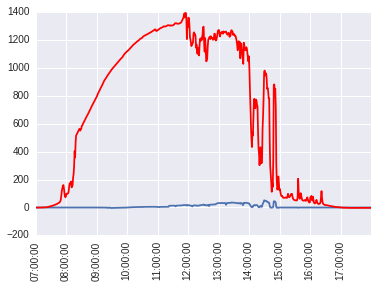

In [168]:
# plot the ac_power consumption of a day in Jan
plt.xticks(rotation=90)
day = 10
plt.plot(jan_per_day[day]['dt'], jan_per_day[day]['ac_power'])
plt.plot(jan_per_day[day]['dt'], jan_per_day[day]['poa_irradiance'], color ='red')
#plt.boxplot(list(jan_per_day[1]['ac_power']))

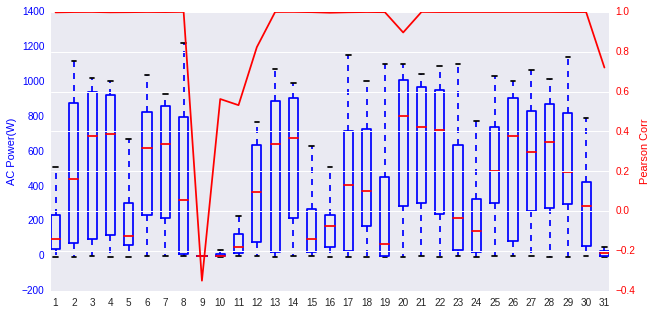

In [169]:
# box plot of AC power and corresponding average ac_power for jan month
data_for_boxplot = []
pearson = []
for i in range(1,32):
    data_for_boxplot.append( (list(jan_per_day[i]['ac_power'])) ) 
    pearson.append(pr(list(jan_per_day[i]['poa_irradiance']),list(jan_per_day[i]['ac_power']))[0])
    
fig, ax1 = plt.subplots(figsize=(10,5))
bp_dict= ax1.boxplot(data_for_boxplot)
ax1.set_ylabel('AC Power(W)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot([i for i in range(1,len(pearson)+1)], pearson, color='r')
ax2.set_ylabel('Pearson Corr', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

Irradiance Stats: Min:-2.311, Avg:734.087, Max:1202.600


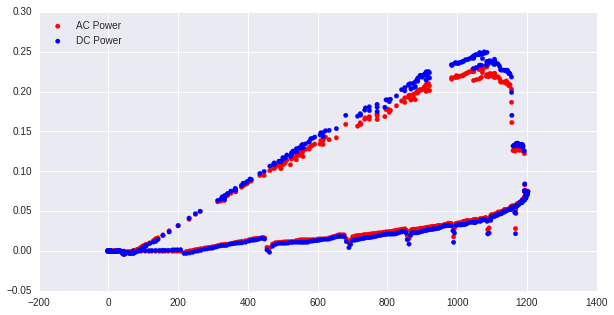

In [170]:
# scatter plot between ac_power, dc_power and poa_irradiance
day = 11
fig, ax1 = plt.subplots(figsize=(10,5))
print 'Irradiance Stats: Min:%0.3f, Avg:%0.3f, Max:%0.3f' %(np.min(jan_per_day[day]['poa_irradiance']), 
                                                            np.mean(jan_per_day[day]['poa_irradiance']), 
                                                           np.max(jan_per_day[day]['poa_irradiance']) )
scatter1 = ax1.scatter(jan_per_day[day]['poa_irradiance'], jan_per_day[day]['ac_power']/1000.0, color='r', label='AC Power')
scatter2 = ax1.scatter(jan_per_day[day]['poa_irradiance'], jan_per_day[day]['dc_power']/1000.0, color='b', label='DC Power')
power_legend = ax1.legend(loc='upper left')

# color the points to know their time

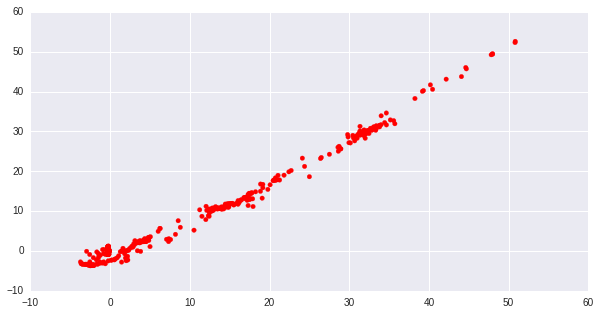

In [171]:
day = 10
fig, ax1 = plt.subplots(figsize=(10,5))
scatter1 = ax1.scatter(jan_per_day[day]['ac_power'], jan_per_day[day]['dc_power'], color='r')


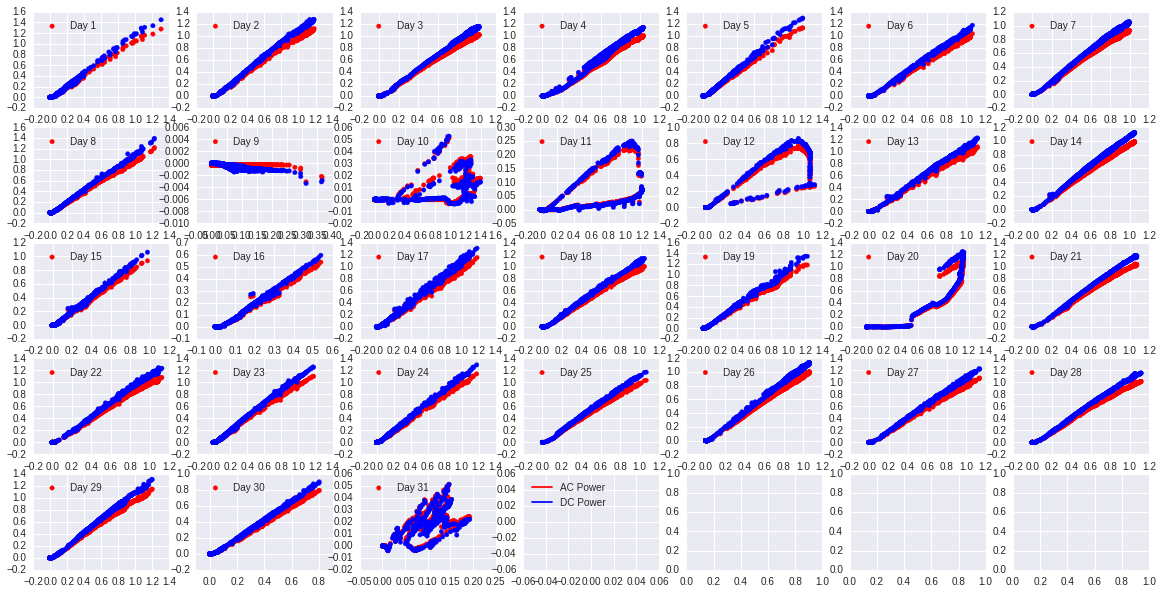

In [172]:
# montly scatter plot of ac power vs irr and dc_power vs irr
rows = 5
columns = 7
fig, ax =plt.subplots(rows, columns, figsize=(20,10))
for day in jan_per_day.keys():
    j = (day-1)%columns
    i = (day-1)/columns
    
    scatter1 = ax[i][j].scatter(jan_per_day[day]['poa_irradiance']/1000.0, jan_per_day[day]['ac_power']/1000.0,
                                color='r', label='Day %d' %day)
    scatter2 = ax[i][j].scatter(jan_per_day[day]['poa_irradiance']/1000.0, jan_per_day[day]['dc_power']/1000.0,
                                color='b')
    power_legend = ax[i][j].legend(loc='upper left')
    
    

    
ax[31/columns][31%columns].plot([],[],color='r',label='AC Power')
ax[31/columns][31%columns].plot([],[],color='b',label='DC Power')
power_legend = ax[31/columns][31%columns].legend(loc='upper left')
    

In [160]:
# plot power values is greater than 10 W
# plot irradiance only if irr value is > 10W/m2

# DC power is what PV outputs


# Hourly aggregate of dc power
# How does dc power vary with hourly cloud cover? Any common variations accross days?


# over the period of time, dust models ?


In [379]:
# weather data plots
weather = pd.read_csv('./weather/2011/20110101.csv', names=['date','mst','global_extra','direct_extra','zenith','azimuth','t_cloud','opaque_cloud','wind_6','wind_19','wind_22'])
weather = weather.drop(weather.index[[0]])
weather.head()

,date,mst,global_extra,direct_extra,zenith,azimuth,t_cloud,opaque_cloud,wind_6,wind_19,wind_22
1,1/1/2011,07:25,3.232,1413.684,89.86899,120.24419,-1,-1,5.887,7.59,11.26
2,1/1/2011,07:26,6.798,1413.684,89.72448,120.40355,-1,-1,4.75,7.47,9.52
3,1/1/2011,07:27,10.384,1413.684,89.57912,120.56320,-1,-1,5.412,7.61,7.56
4,1/1/2011,07:28,13.993,1413.684,89.43286,120.72313,-1,-1,6.275,7.54,8.55
5,1/1/2011,07:29,17.624,1413.684,89.28570,120.88335,-1,-1,6.325,7.62,8.5


In [380]:
date_time = []
for i in range(weather.shape[0]):
    date_ = weather['date'].iloc[i]
    mst_ = weather['mst'].iloc[i]
    
    datetime_  = '%s %s' %(date_, mst_)
    date_time.append( dt.datetime.strptime(datetime_, '%m/%d/%Y %H:%M') )
    
weather['dt'] = pd.Series(date_time, index = weather.index)
weather.head()
    

,date,mst,global_extra,direct_extra,zenith,azimuth,t_cloud,opaque_cloud,wind_6,wind_19,wind_22,dt
1,1/1/2011,07:25,3.232,1413.684,89.86899,120.24419,-1,-1,5.887,7.59,11.26,2011-01-01 07:25:00
2,1/1/2011,07:26,6.798,1413.684,89.72448,120.40355,-1,-1,4.75,7.47,9.52,2011-01-01 07:26:00
3,1/1/2011,07:27,10.384,1413.684,89.57912,120.56320,-1,-1,5.412,7.61,7.56,2011-01-01 07:27:00
4,1/1/2011,07:28,13.993,1413.684,89.43286,120.72313,-1,-1,6.275,7.54,8.55,2011-01-01 07:28:00
5,1/1/2011,07:29,17.624,1413.684,89.28570,120.88335,-1,-1,6.325,7.62,8.5,2011-01-01 07:29:00


In [381]:
# january weather data
weather_per_day = dict()
year = 2011
month =1
days = 31

for day in range(1,days+1):
    st = dt.datetime(year, month, day, 7,0,0)
    et = dt.datetime(year, month, day, 17,59,0)
    weather_per_day[day] = weather[(weather['dt']>= st) & (weather['dt']<= et)]
        

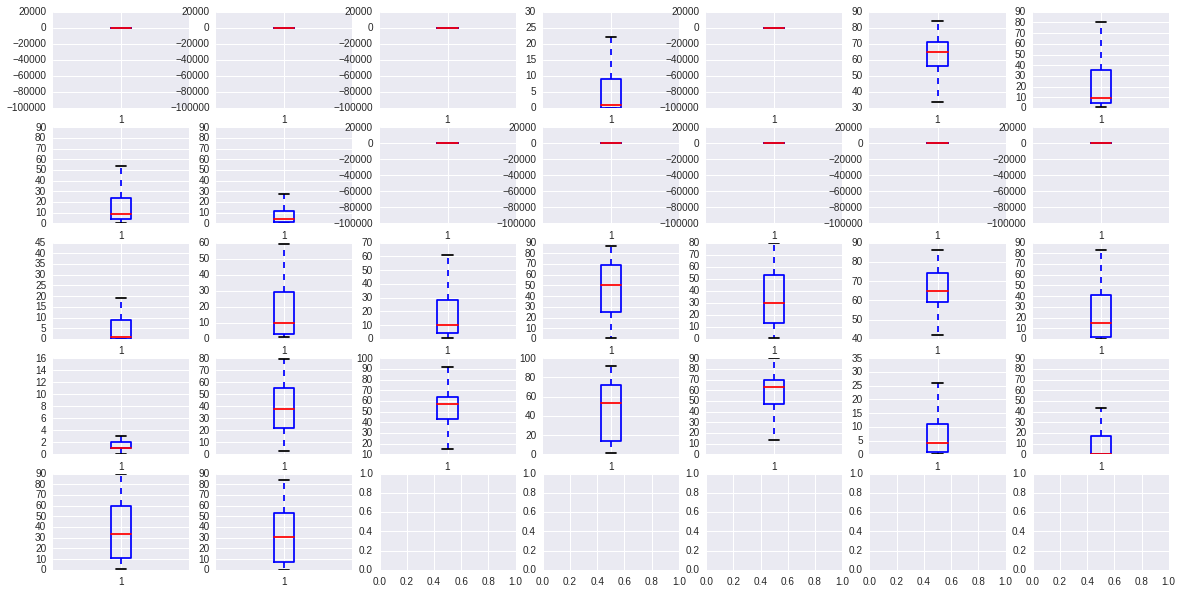

In [297]:
rows = 5
columns = 7
fig, ax =plt.subplots(rows, columns, figsize=(20,10))
for day in weather_per_day.keys():
    j = (day-1)%columns
    i = (day-1)/columns
    
    cloud= weather_per_day[day]['t_cloud']
    opaque = weather_per_day[day]['opaque_cloud']
    #scatter2 = ax[i][j].scatter([float(f) for f in cloud],[float(f) for f in opaque], color='b')
    bp1= ax[i][j].boxplot([float(f) for f in opaque])
    power_legend = ax[i][j].legend(loc='upper left')

In [382]:
# create a merged data frame (weather and pv panel information)
year = 2011
month =1
days = 31

joined_per_day_data = dict()

for day in range(1,days+1):
    st = dt.datetime(year, month, day, 7,0,0)
    et = dt.datetime(year, month, day, 17,59,0)

    weather_temp_df = weather_per_day[day]
    pv_temp_df = jan_per_day[day]

    join_weather_pv = pd.merge(pv_temp_df, weather_temp_df, how='inner', on=['dt'])
    joined_per_day_data[day]= join_weather_pv

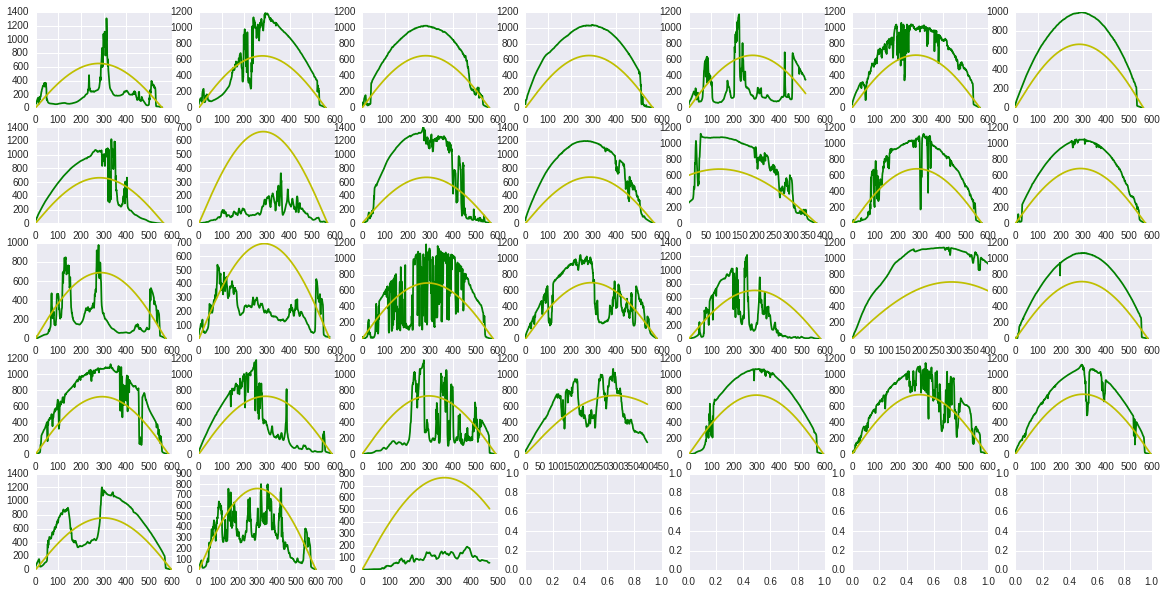

In [390]:
# monthly plots (irr, cloud cover, dc power ....)
rows = 5
columns = 7
fig, ax =plt.subplots(rows, columns ,figsize=(20,10))
for day in joined_per_day_data.keys():
    j = (day-1)%columns
    i = (day-1)/columns
    
    tmp_df = joined_per_day_data[day]
    dt_ = tmp_df['dt']
    cloud = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['t_cloud']) ]
    opaque = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['opaque_cloud']) ]
    irr = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['poa_irradiance']) ]
    girr = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['global_extra']) ]
    dc = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['dc_power']/10.0) ]
    #pt1= ax[i][j].plot(cloud, color='r')
    #pt2= ax[i][j].plot(opaque, color='b')
    pt3= ax[i][j].plot(irr, color='g')
    #pt4= ax[i][j].plot(dc, color='m')
    pt5= ax[i][j].plot(girr, color='y')
    #sp1= ax[i][j].scatter(cloud, opaque)
       

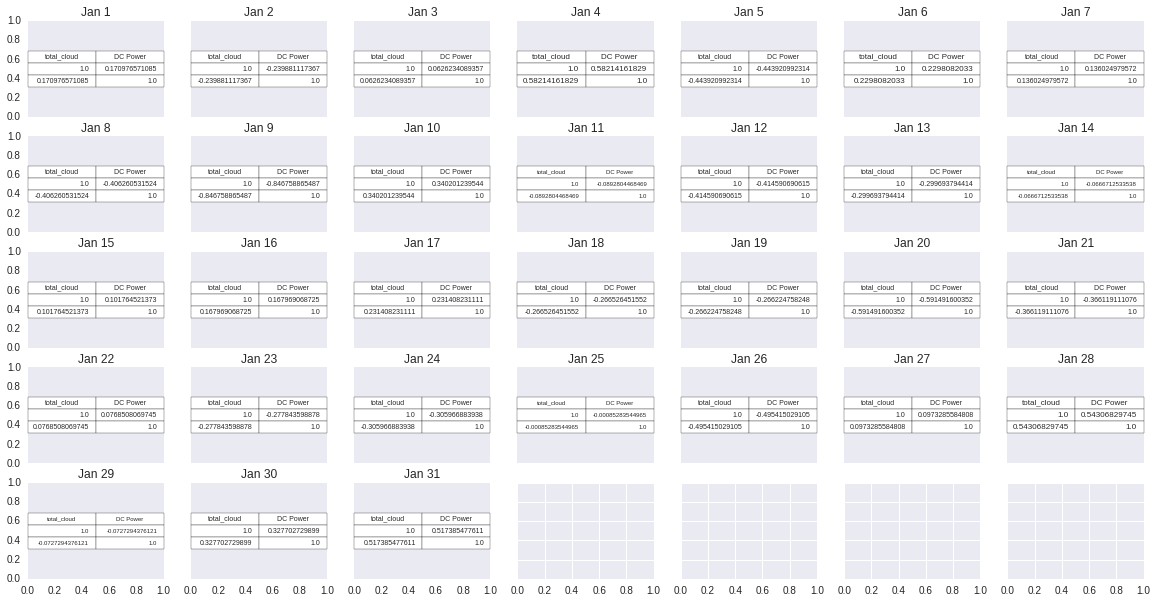

In [385]:
# correlation between irr, cloud cover, dc power ...
rows = 5
columns = 7
corr_ = []
fig, ax =plt.subplots(rows, columns, sharex = True, sharey=True, figsize=(20,10))
col_labels = ['total_cloud','DC Power']
for day in joined_per_day_data.keys():
    j = (day-1)%columns
    i = (day-1)/columns
    
    tmp_df = joined_per_day_data[day]
    dt_ = tmp_df['dt']
    cloud = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['t_cloud']) ]
    opaque = [ 0.0 if float(f) < 0.0 else float(f) for f in list(tmp_df['opaque_cloud']) ]
    irr = [ 0.0 if float(f) < 0.0 else float(f)/10.0 for f in list(tmp_df['poa_irradiance']) ]
    dc = [ 0.0 if float(f) < 0.0 else float(f)/10.0 for f in list(tmp_df['dc_power']) ]
    arr_= np.corrcoef([cloud, dc])
    ax[i][j].table(cellText=arr_, colLabels=col_labels, loc='center')
    ax[i][j].grid(False)
    ax[i][j].set_title('Jan %d' %day)
    corr_.append([day, arr_[0][1]])


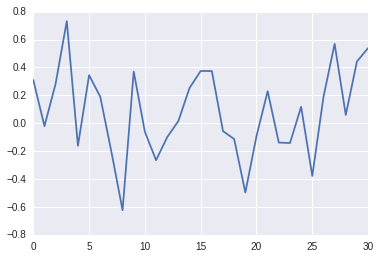

In [375]:
corr_df = pd.DataFrame(corr_, columns=['Day','Corr'])
plt.plot(list(corr_df['Corr']))

In [ ]:
# Find the times of clear sky
# time when the poa_irrandiance matches the Extraterrestrial GHI

print type(joined_per_day_data)
